# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


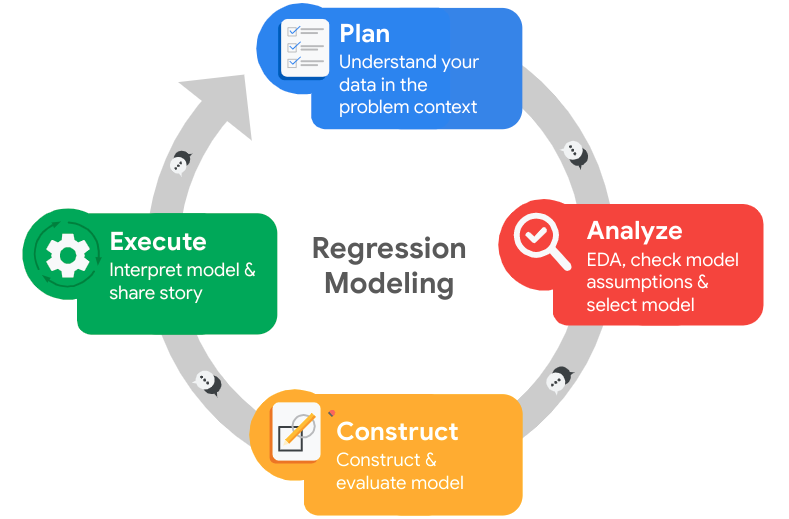

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1- The Human Resources (HR) department at Salifort Motors, who initiated the data collection and will benefit from the data-driven insights and recommendations to improve employee satisfaction and retention.

Senior leadership at Salifort Motors, who will be interested in understanding the factors contributing to employee turnover and the potential impact of implementing suggested initiatives.
The employees of Salifort Motors, as the insights and recommendations may lead to improved job satisfaction and better working conditions.

2-The main goal of this project is to predict whether an employee will leave the company based on various attributes. By building a predictive model, the aim is to identify factors that contribute to employee turnover and provide data-driven recommendations to improve employee satisfaction and retention at Salifort Motors.

3-Number of Rows and Columns: The dataset contains 15,000 rows and 10 columns.Data Types: The data types of the columns include float64 (for satisfaction_level and last_evaluation), int64 (for number_project, average_monthly_hours, time_spend_company, Work_accident, left, and promotion_last_5years), and object (for Department and salary).there are no missing values in any of the columns.

The dataset contains several potential predictor variables such as satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, and salary. These variables might be used to predict the "left" column, indicating whether an employee left the company or not.
4-Pandas and NumPy libraries in Python for data manipulation and analysis.
Matplotlib and Seaborn for data visualization to gain insights from graphical representations.
Jupyter Notebook 

5-What is the purpose of the model? How will its predictions be used? By whom? whom is affected ? How harmful could the effects be? Do I have consent to use personal data?



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [117]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [118]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [119]:
# Gather basic information about the data

print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [120]:
df0.shape

(14999, 10)

### Gather descriptive statistics about the data

In [121]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [122]:
print(df0['Department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [123]:
print(df0.groupby(['Department'])['left'].value_counts(normalize=True))

Department   left
IT           0       0.777506
             1       0.222494
RandD        0       0.846252
             1       0.153748
accounting   0       0.734029
             1       0.265971
hr           0       0.709066
             1       0.290934
management   0       0.855556
             1       0.144444
marketing    0       0.763403
             1       0.236597
product_mng  0       0.780488
             1       0.219512
sales        0       0.755072
             1       0.244928
support      0       0.751009
             1       0.248991
technical    0       0.743750
             1       0.256250
Name: left, dtype: float64


In [124]:
print(df0['department'].value_counts(normalize=True))

KeyError: 'department'

In [125]:
print(df0['left'].value_counts(normalize=True))

0    0.761917
1    0.238083
Name: left, dtype: float64


In [126]:
df0['number_project'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [127]:
df0['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [128]:
# Display all column names
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [129]:
# Rename columns as needed
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'number_project',
    'average_montly_hours': 'average_monthly_hours',  # Correcting misspelled column name
    'time_spend_company': 'time_spend_company',
    'Work_accident': 'work_accident',  # Standardizing to snake_case
    'left': 'left',
    'promotion_last_5years': 'promotion_last_5years',
    'Department': 'department',  # Standardizing to snake_case
    'salary': 'salary'
}, inplace=True)

# Display all column names after the update
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [130]:
# Check for missing values in each column
missing_values = df0.isnull().sum()

# Display the result
print(missing_values)


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [131]:
# Check for duplicates in the DataFrame
duplicates_count = df0.duplicated().sum()

# Display the number of duplicate rows
print("Number of duplicate rows:", duplicates_count)


Number of duplicate rows: 3008


In [132]:
# Inspect some rows containing duplicates as needed
# Remove duplicate rows from the DataFrame
df0.drop_duplicates(inplace=True)

# Check the DataFrame shape after removing duplicates
print("DataFrame shape after removing duplicates:", df0.shape)

#(14999, 10) previous shape

DataFrame shape after removing duplicates: (11991, 10)


In [133]:
# Drop duplicates and save the resulting DataFrame in a new variable
df_cleaned = df0.drop_duplicates()

# Display the first few rows of the new DataFrame
df_cleaned.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

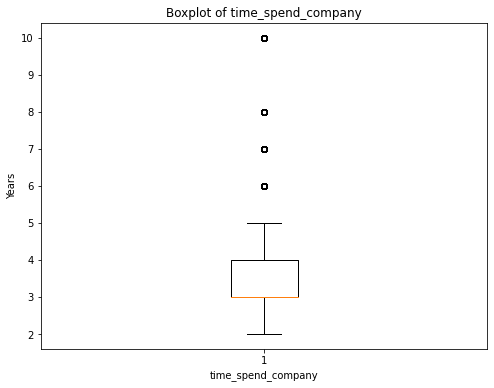

In [134]:
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of `time_spend_company`
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['time_spend_company'])
plt.xlabel('time_spend_company')
plt.ylabel('Years')
plt.title('Boxplot of time_spend_company')
plt.show()



In [135]:
# Determine the number of rows containing outliers
# Calculate the interquartile range (IQR) for 'time_spend_company'
Q1 = df_cleaned['time_spend_company'].quantile(0.25)
Q3 = df_cleaned['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of rows containing outliers
outliers_count = len(df_cleaned[(df_cleaned['time_spend_company'] < lower_bound) | (df_cleaned['time_spend_company'] > upper_bound)])

# Display the number of rows containing outliers
print("Number of rows containing outliers in 'time_spend_company':", outliers_count)


Number of rows containing outliers in 'time_spend_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1-Employee Churn: From the analysis, we can observe that out of the 11,991 employees in the dataset, approximately 83.40% (10,000 employees) stayed with the company, while about 16.60% (1,991 employees) left the company. This indicates that employee retention is a concern.
2-Bar Plot: Percentage of Employees Who Left in Each Department: This plot shows the percentage of employees who left in each department. It can help identify if certain departments have higher turnover rates.

Bar Plot: Count of Employees in Each Department: This plot displays the count of employees in each department, giving an overview of the distribution of employees across departments.

Box Plot: Distribution of average_montly_hours by left: This plot shows the distribution of average monthly hours worked by employees who stayed (0) and those who left (1). It can help identify any differences in working hours between the two groups.

Box Plot: Distribution of number_project by left: This plot shows the distribution of the number of projects employees worked on, comparing those who stayed and those who left. It may reveal insights about the project load's impact on employee turnover.

3-Data Distributions: The boxplots for number_project and time spend show that there are potential outliers in the data, as evidenced by the presence of individual data points beyond the whiskers.

4-Data Transformations: Some data cleaning steps were performed, including dropping duplicate rows to ensure data integrity  that might negatively impact model performance.

5-Purpose of EDA: Exploratory Data Analysis (EDA) is conducted to understand the data, identify patterns, relationships, and trends, and prepare the data for modeling. It helps in feature selection, identifying potential issues like missing data or outliers, and gaining insights that can guide the predictive modeling process.

6-Resources Used: During this stage, Python libraries like Pandas, NumPy, Matplotlib, and Seaborn were used for data manipulation, visualization, and analysis.

7-Ethical Considerations: Is the Data appropriate? well sourced? representative? Do I have consent to use personal data?

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [136]:
# Get numbers of people who left vs. stayed
left_counts = df_cleaned['left'].value_counts()

# Get percentages of people who left vs. stayed
left_percentage = df_cleaned['left'].value_counts(normalize=True) * 100

# Display the results
print("Number of employees who left:\n", left_counts)
print("\nPercentage of employees who left:\n", left_percentage)


Number of employees who left:
 0    10000
1     1991
Name: left, dtype: int64

Percentage of employees who left:
 0    83.39588
1    16.60412
Name: left, dtype: float64


In [137]:
print(df_cleaned.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

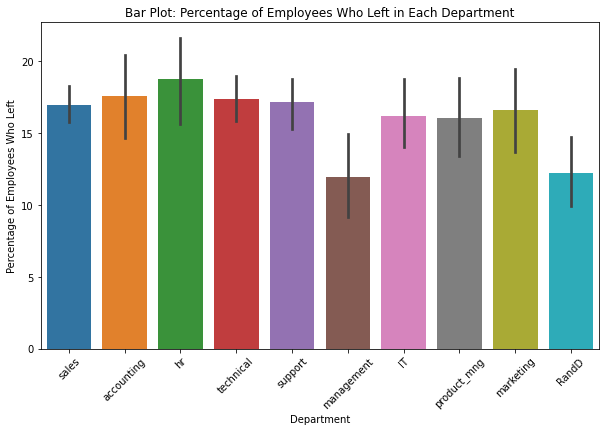

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='left', data=df_cleaned, estimator=lambda x: sum(x) / len(x) * 100)
plt.xlabel('Department')
plt.ylabel('Percentage of Employees Who Left')
plt.title('Bar Plot: Percentage of Employees Who Left in Each Department')
plt.xticks(rotation=45)
plt.show()


The department with the high turn over: hr, accounting.

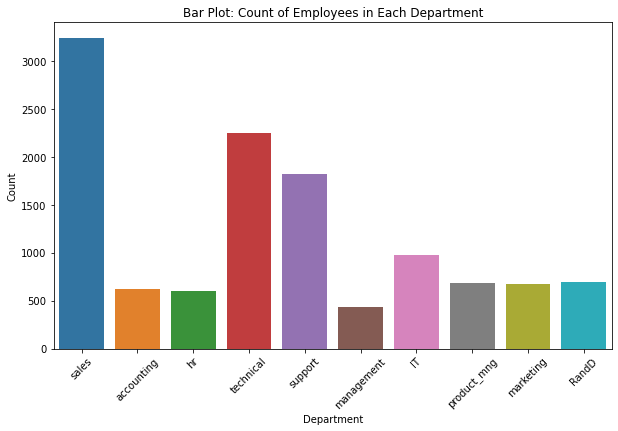

In [139]:
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=df_cleaned)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Bar Plot: Count of Employees in Each Department')
plt.xticks(rotation=45)
plt.show()


departments with the highest number of employees: Sales, technical, support.

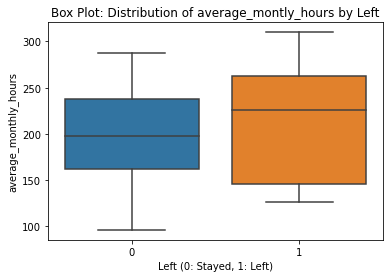

In [140]:
import seaborn as sns

sns.boxplot(x='left', y='average_monthly_hours', data=df_cleaned)
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('average_monthly_hours')
plt.title('Box Plot: Distribution of average_montly_hours by Left')
plt.show()

median monthly hour for employee who stayed:  230 hours
    
median monthly hour for those who left: 200 hours

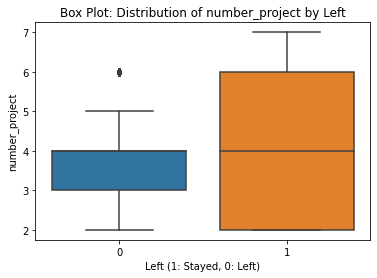

In [141]:
import seaborn as sns

sns.boxplot(x='left', y='number_project', data=df_cleaned)
plt.xlabel('Left (1: Stayed, 0: Left)')
plt.ylabel('number_project')
plt.title('Box Plot: Distribution of number_project by Left')
plt.show()

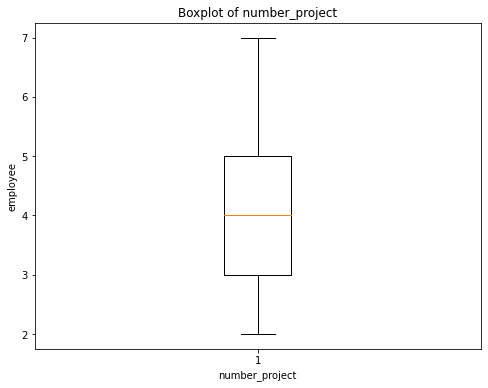

In [142]:
# Create a boxplot to visualize the distribution of number_project
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['number_project'])
plt.xlabel('number_project')
plt.ylabel('employee')
plt.title('Boxplot of number_project')
plt.show()



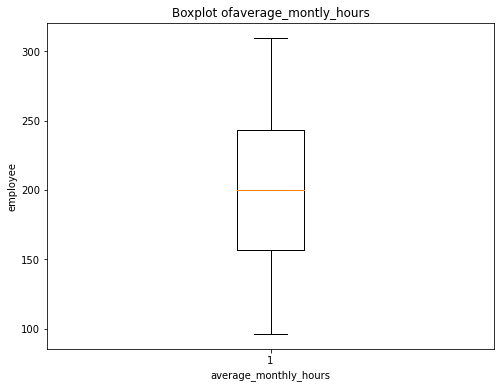

In [143]:
# Create a boxplot to visualize the distribution of average_montly_hours
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['average_monthly_hours'])
plt.xlabel('average_monthly_hours')
plt.ylabel('employee')
plt.title('Boxplot ofaverage_montly_hours')
plt.show()


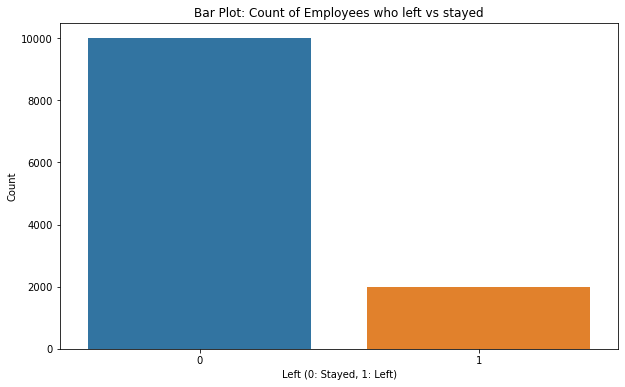

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='left', data=df_cleaned)
plt.xlabel('Left (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.title('Bar Plot: Count of Employees who left vs stayed')
plt.xticks()
plt.show()


imbalanced data set : high group of people who stayed vs left.

### Insights

What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here?

1-imbalanced data set : high group of people who stayed vs left.

2-median monthly hour for employee who stayed:  230 hours
    
median monthly hour for those who left: 200 hours

3-departments with the highest number of employees: Sales, technical, support.

4-The department with the high turn over: hr, accounting.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



There don't seem to be any obvious oddities or issues with the modeling process.

The independent variables (features) chosen for the model include 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', and one-hot encoded 'department' categories. These features are likely chosen based on their potential impact on the target variable ('left') and their relevance to employee attrition prediction.

The XGBoost model (Model 4) seems to be performing the best across these metrics on both the validation and test sets, with the highest recall and F1-score.

There's always room for improvement.  I will Consider experimenting with different algorithms, hyperparameter tuning, feature engineering, and addressing potential data imbalances. 

libraries such as Pandas, Scikit-learn, and XGBoost for data manipulation, modeling, and evaluation.

data privacy, potential biases in the data, and the responsible use of the model's predictions. When dealing with employee data, ensure compliance with data protection regulations and consider the ethical implications of the model's outcomes on individuals and the organization as a whole.How important is it that the model's predictions be explainable?


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

employee churn

### Identify the types of models most appropriate for this task.

ensemble decision tree base models

### Modeling

Add as many cells as you need to conduct the modeling process.

In [180]:
# Apply one-hot encoding to 'department' column
df_cleaned= pd.get_dummies(df0, columns=['department'], drop_first=True)

# Display the first few rows of the updated dataframe
print(df_cleaned.head())



   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   department_RandD  department_accounting  depart

In [177]:
# Get class balance of 'label' col
df_cleaned['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

Approximately 17% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

The final modeling dataset contains 11991 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

Split the data into train/validation/test sets (60/20/20)

In [181]:
from sklearn.model_selection import train_test_split

# 1. Isolate X variables 
X = df_cleaned.drop(['left', 'salary'], axis=1)

# 2. Isolate y variable
y = df_cleaned['left']

# 3. Split into train and test sets (80/20 split)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Split the interim training set (X_train_temp, y_train_temp) into train and validation sets (75/25 split)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp)


In [182]:
# Verify the number of samples in each partitioned dataset
print("Number of samples in the training set:", X_train.shape[0])
print("Number of samples in the validation set:", X_valid.shape[0])
print("Number of samples in the test set:", X_test.shape[0])


Number of samples in the training set: 7194
Number of samples in the validation set: 2398
Number of samples in the test set: 2399


RANDOM FOREST

In [185]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [0.1],
             'max_samples': [0.1],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [186]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 2.64 s, sys: 8.16 ms, total: 2.65 s
Wall time: 2.65 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [187]:
# Examine best score
rf_cv.best_score_

0.7430977980292249

In [188]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.1,
 'max_samples': 0.1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the make_results() function to output all of the scores of your model. Note that the function accepts three arguments.

In [189]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [190]:
#Pass the GridSearch object to the make_results() function.
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.976098,0.743098,0.84355,0.954267


the precision is approximately 0.9761, which means that when the model predicts an employee will leave the company, it is correct about 97.61% of the time.

the recall is approximately 0.7431, which means that the model can identify about 74.31% of the employees who actually left the company.

 the accuracy is approximately 0.9543, which means that the model correctly predicts about 95.43% of all cases in the dataset.

XGBOOST

In [192]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [193]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1min 39s, sys: 630 ms, total: 1min 39s
Wall time: 50.1 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

In [194]:
# Examine best score
xgb_cv.best_score_

0.910445332315773

In [195]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [196]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.976098,0.743098,0.843550,0.954267
0,XGB cv,0.966489,0.910445,0.937357,0.979844


The higher the recall, the better the model is at capturing positive cases. In this case, the XGBoost model has higher recall (0.9104) compared to the Random Forest model (0.7431). This means that the XGBoost model is better at identifying a larger proportion of the employees who actually left the company.

 the XGBoost model has a higher F1 score (0.9374) compared to the Random Forest model (0.8436). This suggests that the XGBoost model performs better overall in terms of balancing precision and recall.
 
 The higher the precision, the more reliable the positive predictions made by the model. In this case, the Random Forest model has slightly higher precision (0.9761) compared to the XGBoost model (0.9665). This means that the Random Forest model is slightly better at making accurate positive predictions.
 
 The XGBoost model has higher accuracy (0.9798) compared to the Random Forest model (0.9543). This means that the XGBoost model has a higher percentage of correct predictions overall.

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

RANDOM FOREST 

In [197]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_valid)

In [198]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [199]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_valid)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.976098,0.743098,0.843550,0.954267
0,XGB cv,0.966489,0.910445,0.937357,0.979844
0,RF val,0.977636,0.768844,0.860759,0.958716


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

The higher the recall, the better the model is at capturing positive cases. Model 2 (XGB cv) has the highest recall (0.9104), followed by Model 3 (RF val) with recall of 0.7688. Model 1 (RF cv) has the lowest recall (0.7431).

XGBOOST

In [200]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_valid)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_valid)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.976098,0.743098,0.843550,0.954267
0,XGB cv,0.966489,0.910445,0.937357,0.979844
0,RF val,0.977636,0.768844,0.860759,0.958716
0,XGB val,0.968085,0.914573,0.940568,0.980817


Model 4 (XGBoost - Validation Set) performs the best across all metrics, with the highest accuracy, precision, recall, and F1 score. Model 2 (XGBoost - Cross-Validation) performs second best, followed by Model 3 (Random Forest - Validation Set). Model 1 (Random Forest - Cross-Validation) performs slightly lower in terms of precision, recall, F1 score, and accuracy compared to the other three models

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [201]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.976098,0.743098,0.843550,0.954267
0,XGB cv,0.966489,0.910445,0.937357,0.979844
0,RF val,0.977636,0.768844,0.860759,0.958716
0,XGB val,0.968085,0.914573,0.940568,0.980817
0,XGB test,0.955959,0.927136,0.941327,0.980825


XGB still has the highest recall value 

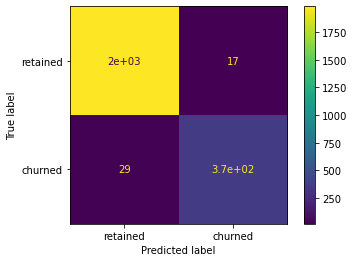

In [202]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

The model predicted around 2 times as  false negatives than it did false positives.

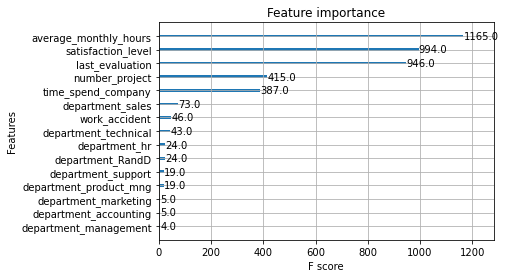

In [203]:
plot_importance(xgb_cv.best_estimator_);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



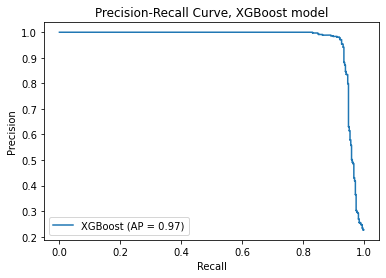

In [213]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Plot precision-recall curve
plot_precision_recall_curve(xgb_cv.best_estimator_, X_test, y_test, name='XGBoost')

plt.title('Precision-Recall Curve, XGBoost model')
plt.show()


✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Key Insights:

The XGBoost model outperformed the Random Forest model in terms of recall, F1-score, and accuracy on both the validation and test datasets.
The XGBoost model achieved a high recall, indicating that it can effectively identify a significant portion of employees who may leave the company.
Employee satisfaction, evaluation, number of projects, average monthly hours, and time spent in the company are crucial factors influencing employee attrition.
The unbalanced nature of the dataset (approximately 17% churned) may impact model performance. Techniques such as class balancing or different evaluation metrics may be considered.


Model Improvement:
The model's performance could be further improved by:

Conducting more extensive hyperparameter tuning for both XGBoost and Random Forest models.
Exploring additional features or transforming existing ones to capture more complex relationships.
Experimenting with different ensemble techniques to combine the strengths of multiple models.


Other Questions to Address:

What are the specific factors influencing each employee's decision to leave?
Are there any specific departments or roles with higher attrition rates, and if so, what are the reasons behind it?
How does employee satisfaction change over time, and how does it relate to attrition?
What are the long-term effects of employee attrition on the company's performance and culture?

Ethical Considerations:

Do the model make sense? Are predictions fair? is somebody responsible for monitoring model pre- and post-deployment?Ensure data privacy and comply with data protection regulations when handling employee data.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

Business Recommendations:

Focus on improving employee satisfaction, work-life balance, and overall engagement to reduce attrition rates.

Identify employees at higher risk of leaving based on model predictions and proactively address their concerns.

Conduct exit interviews and analyze feedback from departing employees to gain insights into the reasons behind attrition.

Develop retention strategies tailored to different employee segments based on their likelihood of leaving.

Potential Recommendations to the Manager/Company:

Invest in employee development programs to enhance skills and job satisfaction.
Implement flexible work arrangements to promote work-life balance and improve employee well-being.
Recognize and reward high-performing employees to boost motivation and loyalty.
Regularly monitor key employee metrics and proactively intervene if early signs of attrition are detected.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.